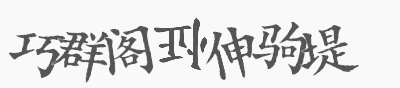

In [1]:
from PIL import Image, ImageFont, ImageDraw
im = Image.open('./online_set/c.gif')
%matplotlib inline
im

In [2]:
from chunhu import util
ret = util.RandomGenerateOneFile()
ret[1]

[(-2, -2, -167, u'\u7194', 42.30031556036694, 46.047410612573785, 0),
 (50, -7, -161, u'\u8d30', 97.38696305431883, 43.486715160029625, 0),
 (103, 3, -174, u'\u8365', 143.08845522723163, 47.53842238773474, 0),
 (165, -7, -161, u'\u56f0', 212.3869630543188, 43.486715160029625, 0),
 (220, -3, 169, u'\u965f', 263.16174741455427, 44.11583835490984, 0),
 (269, -3, 175, u'\u53a9', 308.4363945839568, 40.98158936067726, 0),
 (316, -1, -11, u'\u836c', 359.16174741455427, 46.11583835490983, 1)]

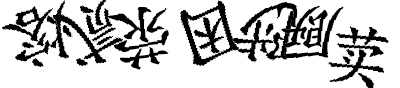

In [8]:
ret[0]

In [5]:
r = util.PaintPoint(ret[0], 90, 50)

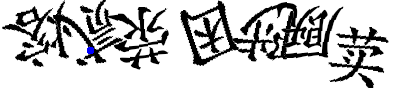

In [9]:
r